In [927]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, roc_auc_score

In [928]:
df = pd.read_csv('connnected_economic_data/connnected_economic_data_1.csv',  parse_dates=['period'])
df.set_index('period', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\3624714990.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('connnected_economic_data/connnected_economic_data_1.csv',  parse_dates=['period'])


## EDA

In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2015_H1 to 2024_H2
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   final_seniority                   60 non-null     object 
 1   average_salary                    60 non-null     float64
 2   gdp_mln_uah                       60 non-null     int64  
 3   delta_gdp_mln_uah                 60 non-null     float64
 4   percent_delta_gdp_mln_uah         60 non-null     object 
 5   gdp_mln_usd                       54 non-null     float64
 6   delta_gdp_mln_usd                 54 non-null     float64
 7   percent_delta_gdp_mln_usd         54 non-null     object 
 8   consumer price index              60 non-null     float64
 9   average_salary_usd                48 non-null     float64
 10  delta_average_salary_usd          48 non-null     float64
 11  percent_delta_average_salary_usd  48 non-null     object 
 12  exch

In [930]:
df.head(10)

,final_seniority,average_salary,gdp_mln_uah,delta_gdp_mln_uah,percent_delta_gdp_mln_uah,gdp_mln_usd,delta_gdp_mln_usd,percent_delta_gdp_mln_usd,consumer price index,average_salary_usd,delta_average_salary_usd,percent_delta_average_salary_usd,exchange_rate_uah_usd,google_search_for_data_science,final_consumption_expenditure
period,,,,,,,,,,,,,,,
2015_H1,junior,784.363636,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,3.640188,213.8,-180.0,-45.7%,16.16,40.0,NaN
2015_H1,middle,1047.400000,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,3.640188,213.8,-180.0,-45.7%,16.16,40.0,NaN
2015_H1,senior,3887.500000,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,3.640188,213.8,-180.0,-45.7%,16.16,40.0,NaN
2015_H2,junior,780.633333,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,7.743439,213.8,-180.0,-45.7%,16.16,56.0,NaN
2015_H2,middle,1533.461538,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,7.743439,213.8,-180.0,-45.7%,16.16,56.0,NaN
2015_H2,senior,4680.000000,1979458,412730.0,26.3%,90615.0,-41190.0,-31.3%,7.743439,213.8,-180.0,-45.7%,16.16,56.0,NaN
2016_H1,junior,1160.181818,2383182,403724.0,20.4%,93270.0,2655.0,2.9%,1.193761,173.4,-40.4,-18.9%,25.15,113.0,3.583695e+12
2016_H1,middle,1832.142857,2383182,403724.0,20.4%,93270.0,2655.0,2.9%,1.193761,173.4,-40.4,-18.9%,25.15,113.0,3.583695e+12
2016_H1,senior,4375.000000,2383182,403724.0,20.4%,93270.0,2655.0,2.9%,1.193761,173.4,-40.4,-18.9%,25.15,113.0,3.583695e+12


In [931]:
print("Кількість рядків та стовпців:", df.shape)
print("\nТипи даних:")
print(df.dtypes)

Кількість рядків та стовпців: (60, 15)

Типи даних:
final_seniority                      object
average_salary                      float64
gdp_mln_uah                           int64
delta_gdp_mln_uah                   float64
percent_delta_gdp_mln_uah            object
gdp_mln_usd                         float64
delta_gdp_mln_usd                   float64
percent_delta_gdp_mln_usd            object
consumer price index                float64
average_salary_usd                  float64
delta_average_salary_usd            float64
percent_delta_average_salary_usd     object
exchange_rate_uah_usd               float64
google_search_for_data_science      float64
final_consumption_expenditure       float64
dtype: object


In [932]:
print("\nКількість унікальних значень:")
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")


Кількість унікальних значень:
final_seniority: 3
average_salary: 60
gdp_mln_uah: 10
delta_gdp_mln_uah: 10
percent_delta_gdp_mln_uah: 10
gdp_mln_usd: 10
delta_gdp_mln_usd: 10
percent_delta_gdp_mln_usd: 10
consumer price index: 20
average_salary_usd: 9
delta_average_salary_usd: 9
percent_delta_average_salary_usd: 9
exchange_rate_uah_usd: 9
google_search_for_data_science: 20
final_consumption_expenditure: 19


In [933]:
print("\nКількість пропущених значень:")
print(df.isnull().sum())
print(f'\nКількість дублікатів: {df.duplicated().sum()}')


Кількість пропущених значень:
final_seniority                      0
average_salary                       0
gdp_mln_uah                          0
delta_gdp_mln_uah                    0
percent_delta_gdp_mln_uah            0
gdp_mln_usd                          6
delta_gdp_mln_usd                    6
percent_delta_gdp_mln_usd            6
consumer price index                 0
average_salary_usd                  12
delta_average_salary_usd            12
percent_delta_average_salary_usd    12
exchange_rate_uah_usd               12
google_search_for_data_science       0
final_consumption_expenditure        6
dtype: int64

Кількість дублікатів: 0


#### Convert % to float

In [934]:
percent_cols = [
    'percent_delta_gdp_mln_uah',
    'percent_delta_gdp_mln_usd',
    'percent_delta_average_salary_usd'
]
for col in percent_cols:
    df[col] = df[col].str.replace('%', '', regex=False).astype(float)

In [935]:
def single_var_plot(data_series: pd.Series, ax: list[plt.Axes]):
    """Adds plots (hist, box and stat estimators) to the [ax] corresponding to numerical data in [data_series]"""
    name = data_series.name
    
    sns.histplot(data_series, ax=ax[0], kde=True, bins='doane', element="step", color="wheat")
    
   # ax[1].boxplot(data_series, notch=True, vert=False, patch_artist=True, boxprops={'facecolor': 'tan', 'edgecolor':'#8B4513'}, medianprops={'color':'#8B4513', 'linewidth': 2})
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    est_ser = data_series.describe()

    est_ser['median'] = data_series.median()
    est_ser['mode'] = data_series.mode().to_list()
    est_ser['skewness'] = data_series.skew()
    est_ser['kurtosis'] = data_series.kurtosis()
    ax[1].set_facecolor('white')
    ax[1].text(0.1, 0.1, est_ser.to_string(), fontsize=13)

def vis_num_column(sub_df: pd.DataFrame):
    """Visualizes distribution estimation and boxplot of column from [sub_df]"""
    n = sub_df.shape[1]
    f, axs = plt.subplots(n, 2, figsize=(16, n*4.5))
    for i in range(n):
        single_var_plot(sub_df.iloc[:, i], axs[i])
    for title, i in zip(['Histogram', 'Stats'], range(2)):
        axs[0][i].set_title(title, fontsize=16)
    plt.show()

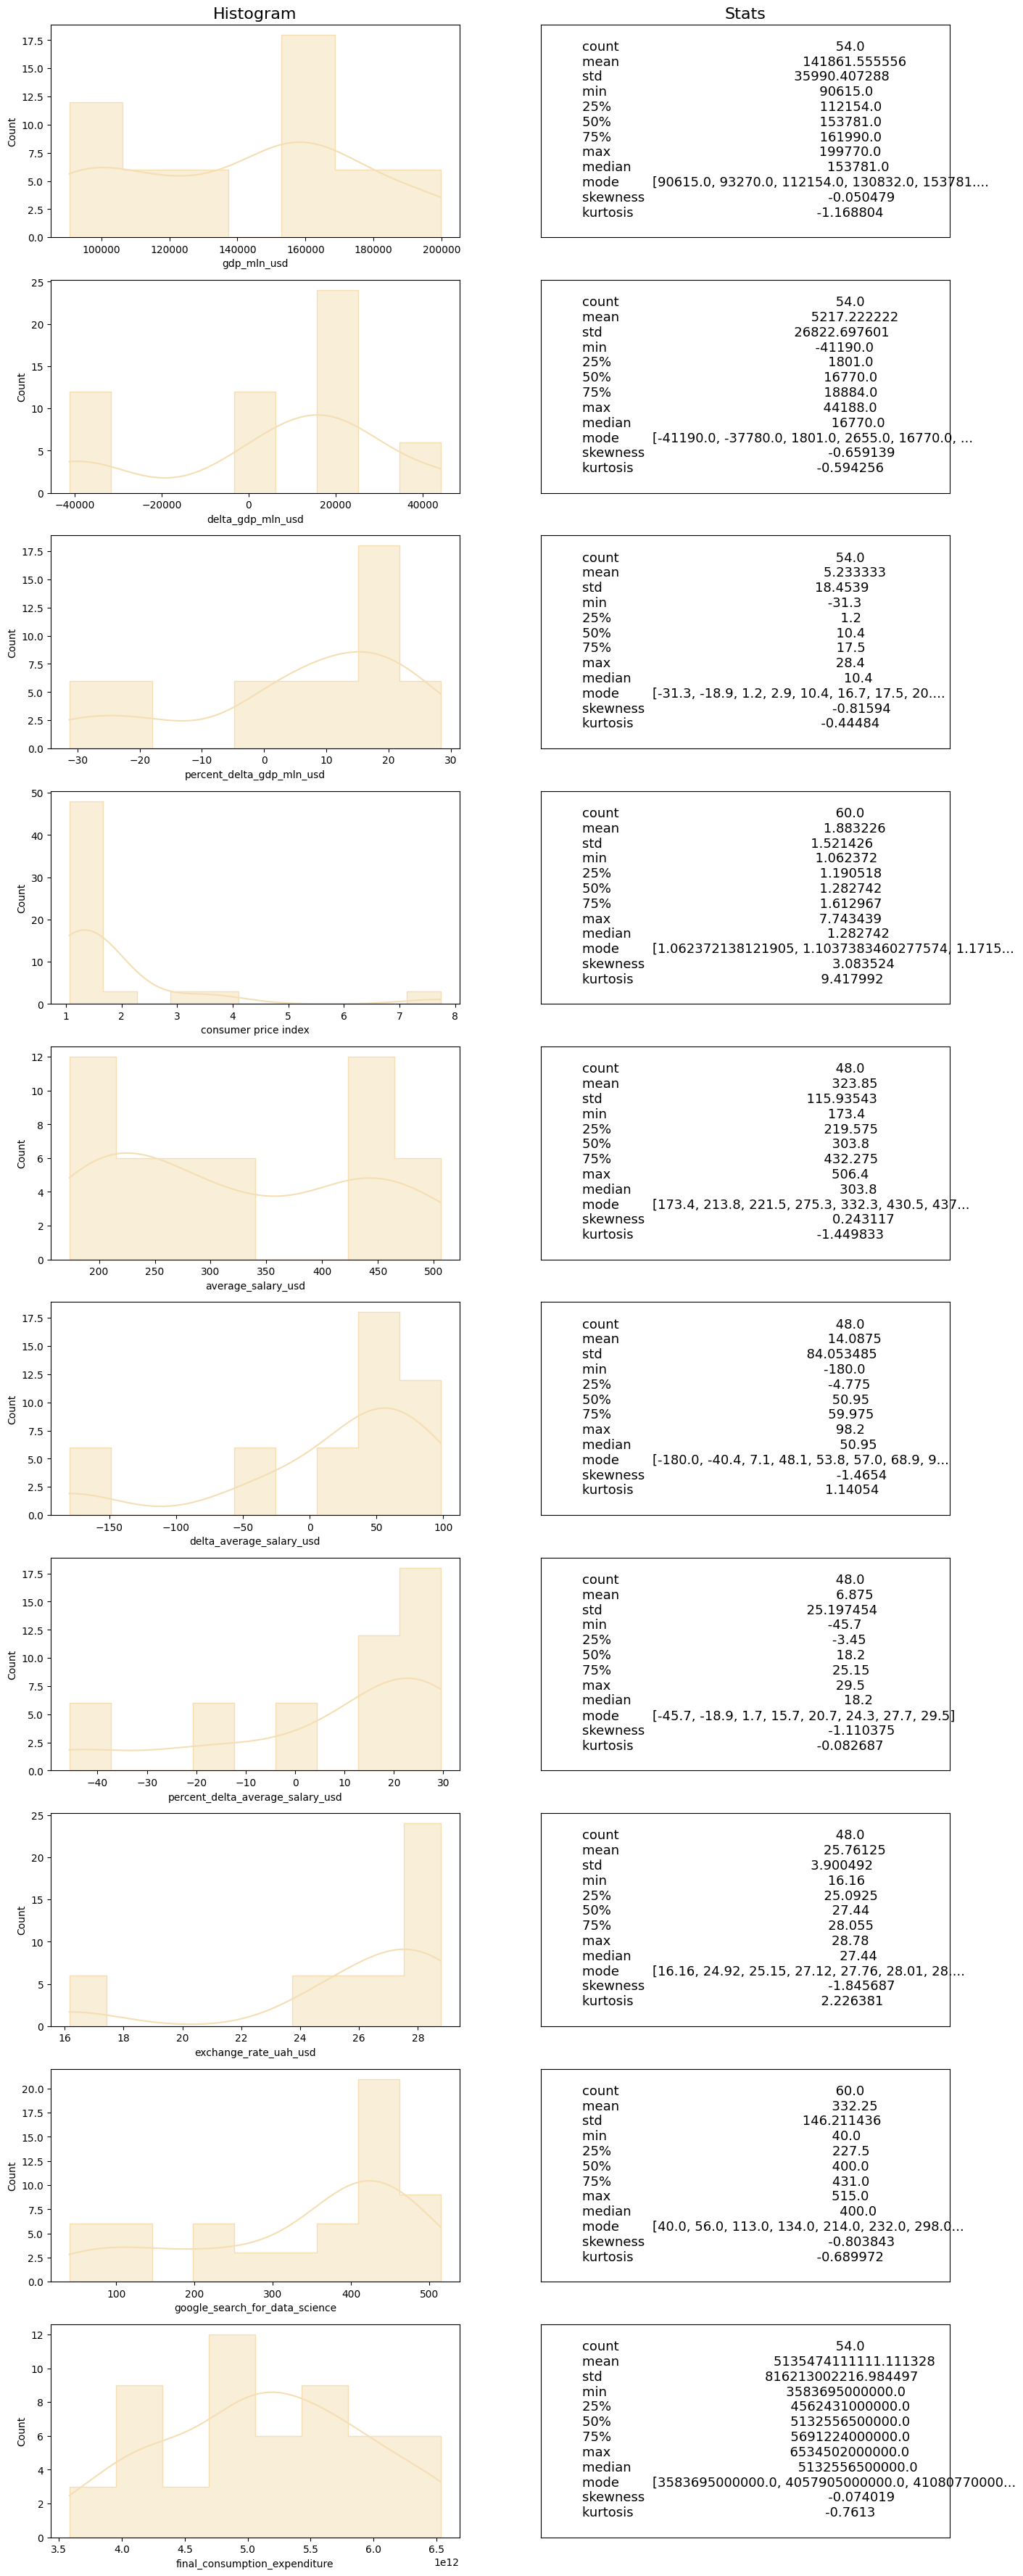

In [936]:
vis_num_column(df.loc[:, ['gdp_mln_usd', 'delta_gdp_mln_usd', 'percent_delta_gdp_mln_usd', 'consumer price index', 'average_salary_usd', 'delta_average_salary_usd',
                          'percent_delta_average_salary_usd', 'exchange_rate_uah_usd', 'google_search_for_data_science', 'final_consumption_expenditure']])

<Axes: xlabel='final_seniority', ylabel='count'>

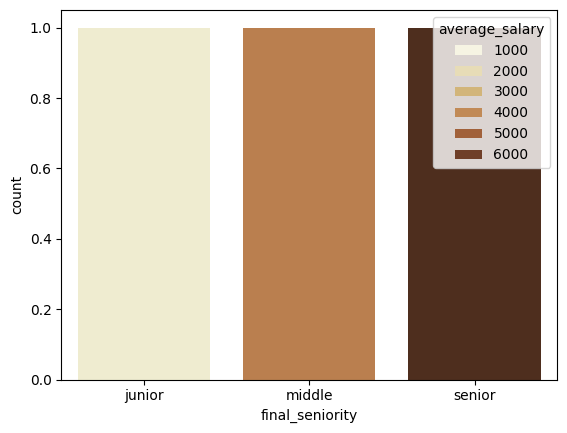

In [937]:
sns.countplot(x=df['final_seniority'], hue=df['average_salary'], palette='YlOrBr',dodge=False,  saturation=0.5)

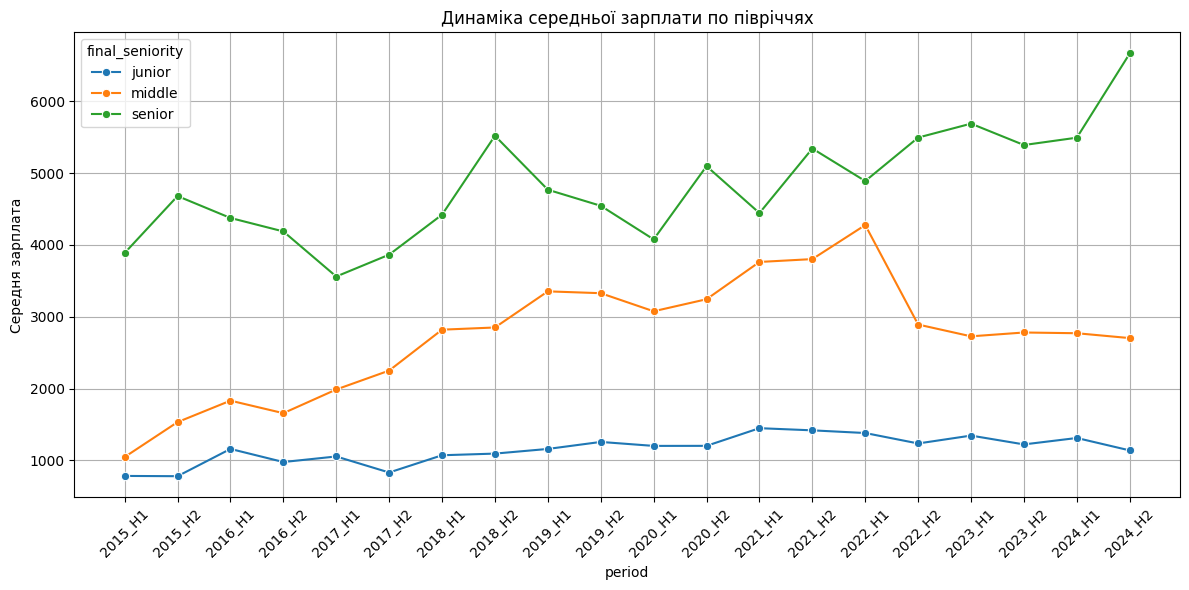

In [938]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='period', y='average_salary', hue='final_seniority', marker='o')
plt.xticks(rotation=45)
plt.title('Динаміка середньої зарплати по півріччях')
plt.ylabel('Середня зарплата')
plt.grid(True)
plt.tight_layout()
plt.show()

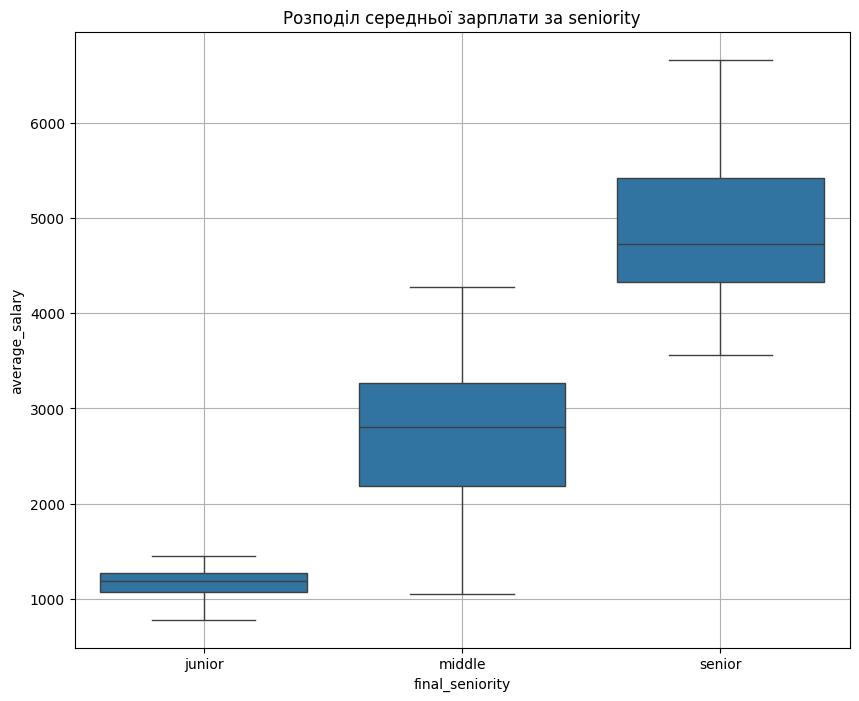

In [939]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='final_seniority', y='average_salary')
plt.title('Розподіл середньої зарплати за seniority')
plt.grid(True)
plt.show()

In [940]:
def adf_test(series):
    result = adfuller(series)
    print("ADF p-value:", result[1])
    
def kpss_test(series):
    result = kpss(series, regression='c')
    print("KPSS p-value:", result[1])


In [941]:
for level in df['final_seniority'].unique():
    print(f"\n=== {level.upper()} ===")
    sub_series = df[df['final_seniority'] == level].sort_values('period')['average_salary']
    adf_test(sub_series)
    kpss_test(sub_series)


=== JUNIOR ===
ADF p-value: 0.00038197597214871526
KPSS p-value: 0.022553821061996163

=== MIDDLE ===
ADF p-value: 0.9243427088444273
KPSS p-value: 0.048923546290978344

=== SENIOR ===
ADF p-value: 0.997481299351167
KPSS p-value: 0.01


C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2998958051.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


#### Both tests indicate non-stationarity of the series

In [942]:
df = df.sort_values(['final_seniority', 'period'])
df['salary_diff'] = df.groupby('final_seniority')['average_salary'].diff()
for level in df['final_seniority'].unique():
    print(f"\n=== {level.upper()} (DIFFERENCED) ===")
    sub_series = df[df['final_seniority'] == level]['salary_diff'].dropna()
    adf_test(sub_series)
    kpss_test(sub_series)



=== JUNIOR (DIFFERENCED) ===
ADF p-value: 3.496783993878209e-09
KPSS p-value: 0.04166666666666672

=== MIDDLE (DIFFERENCED) ===
ADF p-value: 0.9989251337131194
KPSS p-value: 0.1

=== SENIOR (DIFFERENCED) ===
ADF p-value: 9.53986949698269e-07
KPSS p-value: 0.1


C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2998958051.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2998958051.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


#### After 1st order differentiation, the series became stationary

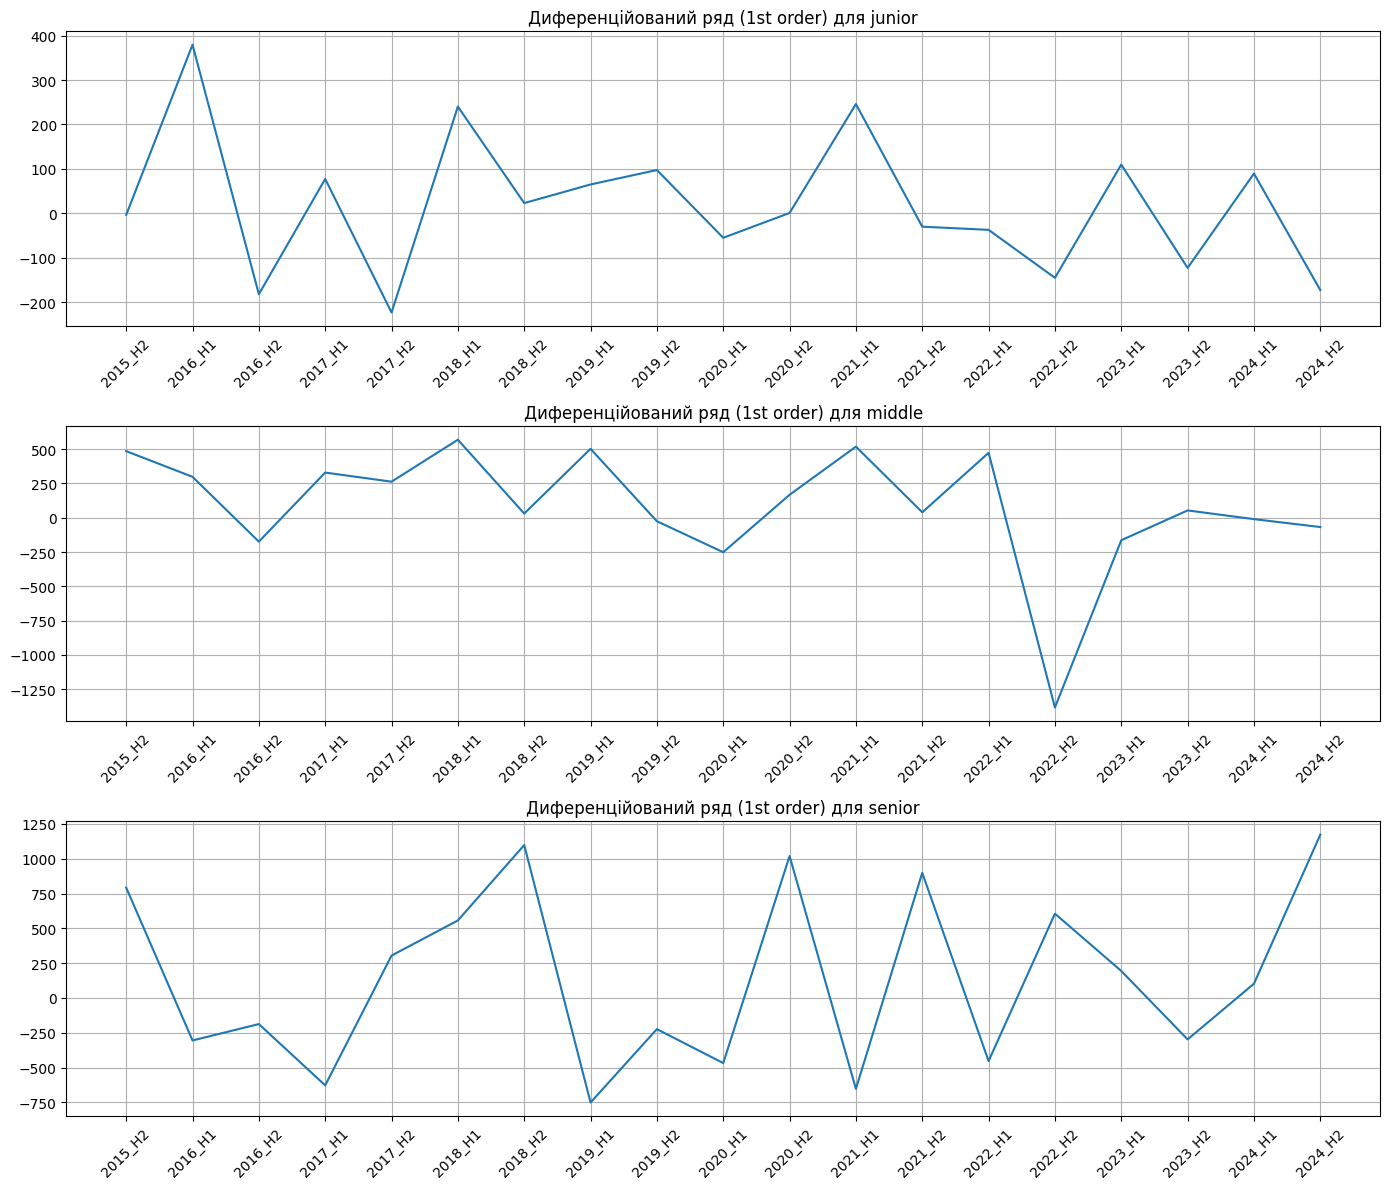

In [943]:
def plot_diff_by_seniority(df, seniority_col='final_seniority', value_col='average_salary'):
    unique_seniorities = df[seniority_col].dropna().unique()

    plt.figure(figsize=(14, 4 * len(unique_seniorities)))

    for i, level in enumerate(sorted(unique_seniorities), start=1):
        df_level = df[df[seniority_col] == level].copy()
        diff_series = df_level[value_col].diff().dropna()

        plt.subplot(len(unique_seniorities), 1, i)
        plt.plot(diff_series)
        plt.title(f"Диференційований ряд (1st order) для {level}")
        plt.xticks(rotation=45)
        plt.grid(True)

    plt.tight_layout()
    plt.show()
plot_diff_by_seniority(df)

### decomposition

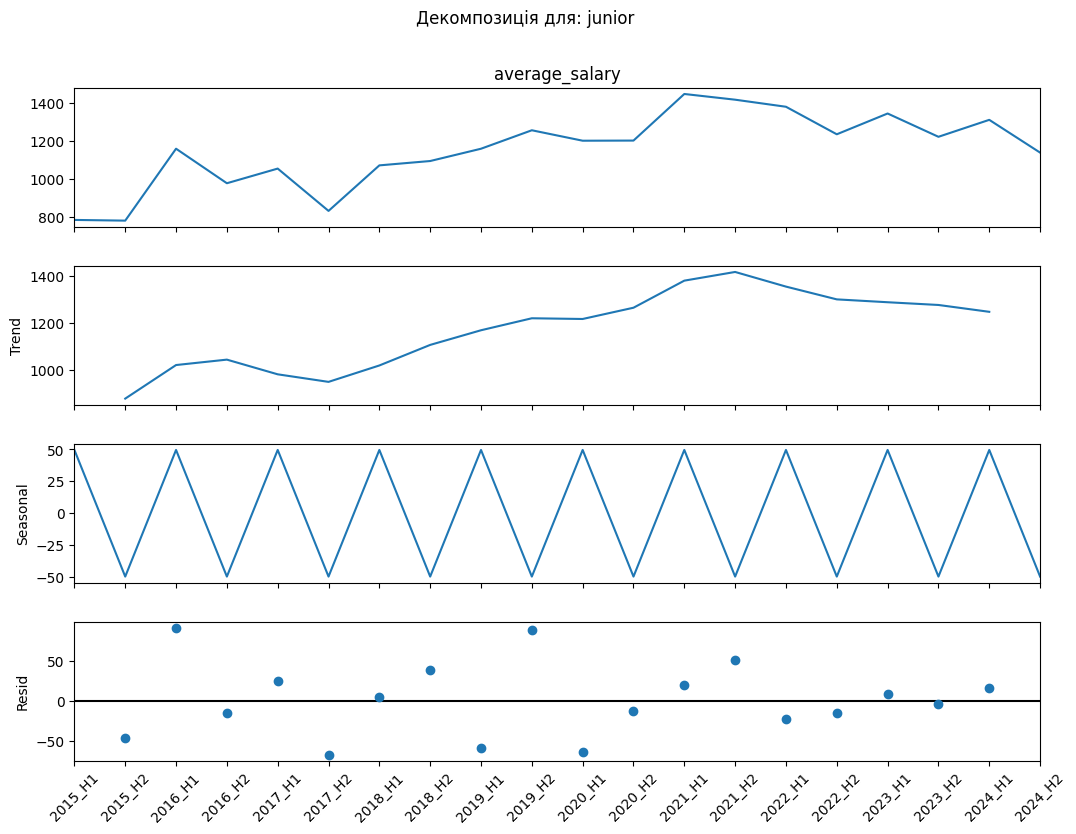

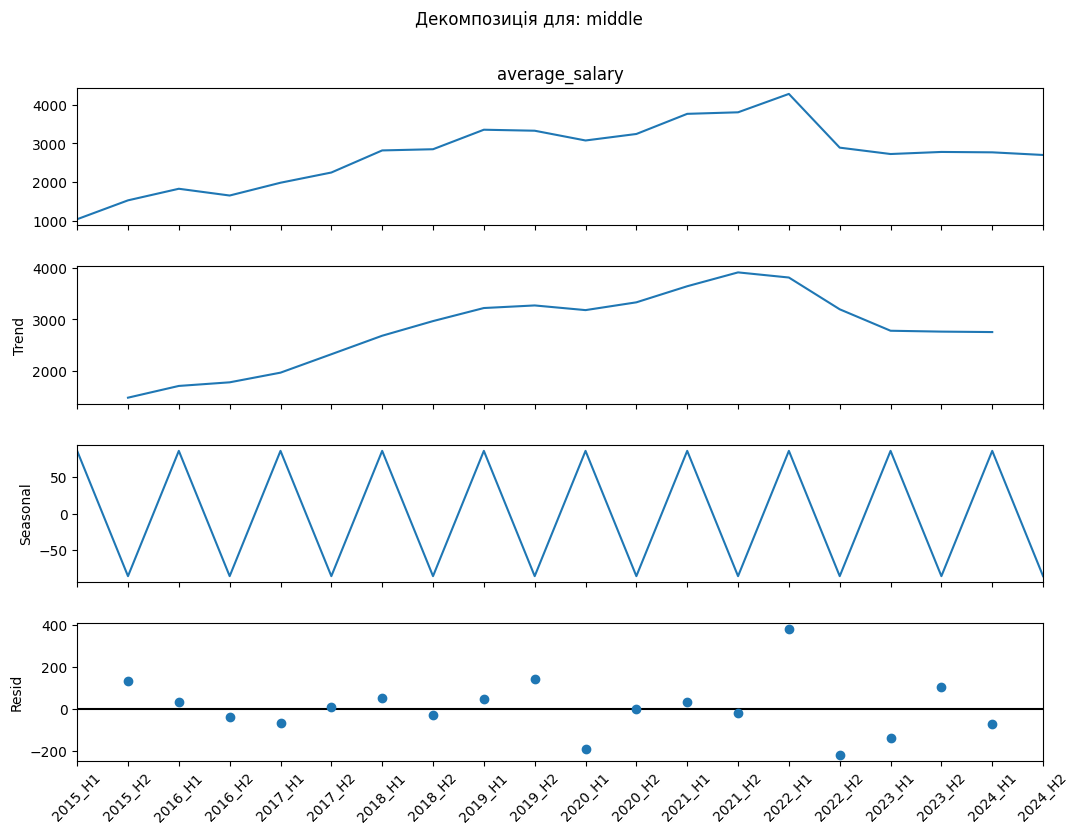

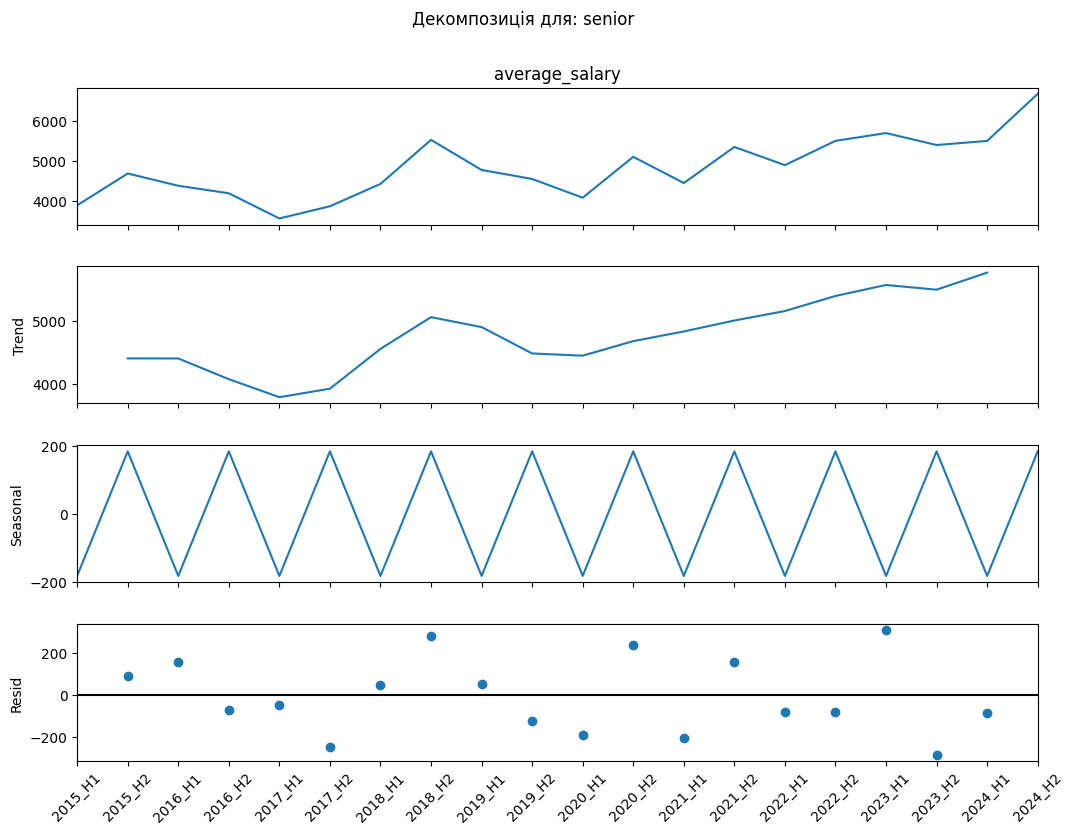

In [944]:
for level in df['final_seniority'].unique():
    subset = df[df['final_seniority'] == level].copy()
    ts = subset['average_salary']
    decomposition = seasonal_decompose(ts, model='additive', period=2)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f"Декомпозиція для: {level}", y=1.02)
    plt.xticks(rotation=45)
    plt.show()


### Periodogram

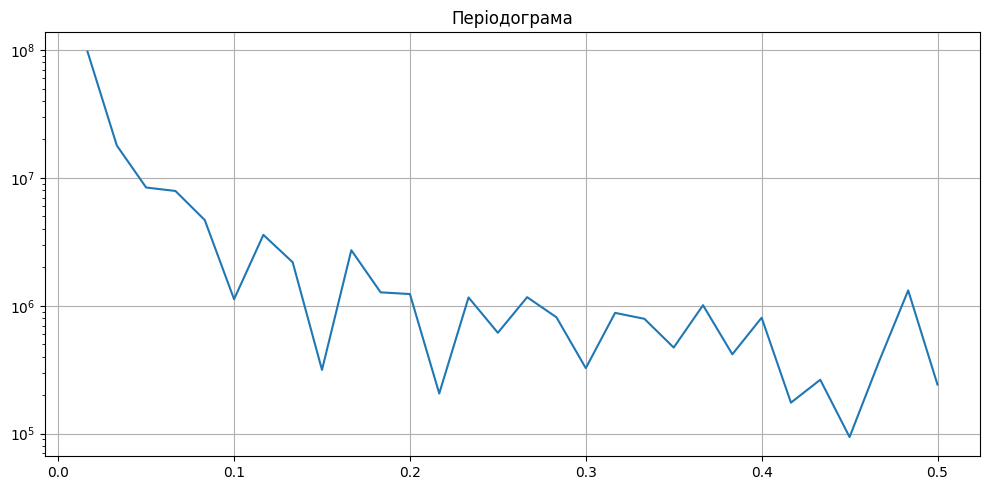

In [945]:
signal = df['average_salary'].values
fs = 1  

frequencies, power = periodogram(signal, fs=fs)
frequencies = frequencies[1:]
power = power[1:]

plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, power)
plt.title('Періодограма')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Fill exchange rate

In [946]:
df['exchange_rate_uah_usd'] = df['exchange_rate_uah_usd'].interpolate(method='linear')
print(df['exchange_rate_uah_usd'].isna().sum())

0


#### Now we can use exchange rate to fill 'gdp_mln_usd', 'delta_gdp_mln_usd', 'percent_delta_gdp_mln_usd', based on uah equivalents. Than just drop uah columns (because there are the same columns usd) to use the only one currency.

In [947]:
mask = df['gdp_mln_usd'].isna()
df.loc[mask, 'gdp_mln_usd'] = df.loc[mask, 'gdp_mln_uah'] / df.loc[mask, 'exchange_rate_uah_usd']
mask = df['delta_gdp_mln_usd'].isna()
df.loc[mask, 'delta_gdp_mln_usd'] = df.loc[mask, 'delta_gdp_mln_uah'] / df.loc[mask, 'exchange_rate_uah_usd']
mask = df['percent_delta_gdp_mln_usd'].isna()
df.loc[mask, 'percent_delta_gdp_mln_usd'] = (
    df.loc[mask, 'delta_gdp_mln_usd'] / df.loc[mask, 'gdp_mln_usd'].shift(1)
) * 100

columns_to_keep = [ 'final_seniority', 'average_salary', 'gdp_mln_usd', 'delta_gdp_mln_usd', 'percent_delta_gdp_mln_usd', 'consumer price index', 'average_salary_usd', 'delta_average_salary_usd', 'percent_delta_average_salary_usd', 'exchange_rate_uah_usd', 'google_search_for_data_science', 'final_consumption_expenditure'
]

df_usd = df[columns_to_keep]
print("Кількість пропущених значень після заповнення:")
print(df_usd.isnull().sum())

Кількість пропущених значень після заповнення:
final_seniority                      0
average_salary                       0
gdp_mln_usd                          0
delta_gdp_mln_usd                    0
percent_delta_gdp_mln_usd            1
consumer price index                 0
average_salary_usd                  12
delta_average_salary_usd            12
percent_delta_average_salary_usd    12
exchange_rate_uah_usd                0
google_search_for_data_science       0
final_consumption_expenditure        6
dtype: int64


#### work with index 'period'

In [948]:
df_usd['year'] = df_usd.index.str[:4].astype(int)
df_usd['half'] = df_usd.index.str[-2:]
df_usd['date'] = pd.to_datetime(df_usd['year'].astype(str) + np.where(df_usd['half'] == 'H1', '-06-30', '-12-31'))
df_usd['half'] = df_usd['half'].replace({'H1': 1, 'H2': 2})
df_usd = df_usd.sort_values('date')
df_usd.set_index('date', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2121680584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['year'] = df_usd.index.str[:4].astype(int)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2121680584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['half'] = df_usd.index.str[-2:]
C:\Users\Asus\AppData\Local\Temp\ipykernel_13684\2121680584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [949]:
df_usd.head()

,final_seniority,average_salary,gdp_mln_usd,delta_gdp_mln_usd,percent_delta_gdp_mln_usd,consumer price index,average_salary_usd,delta_average_salary_usd,percent_delta_average_salary_usd,exchange_rate_uah_usd,google_search_for_data_science,final_consumption_expenditure,year,half
date,,,,,,,,,,,,,,
2015-06-30,junior,784.363636,90615.0,-41190.0,-31.3,3.640188,213.8,-180.0,-45.7,16.16,40.0,NaN,2015,1
2015-06-30,middle,1047.400000,90615.0,-41190.0,-31.3,3.640188,213.8,-180.0,-45.7,16.16,40.0,NaN,2015,1
2015-06-30,senior,3887.500000,90615.0,-41190.0,-31.3,3.640188,213.8,-180.0,-45.7,16.16,40.0,NaN,2015,1
2015-12-31,junior,780.633333,90615.0,-41190.0,-31.3,7.743439,213.8,-180.0,-45.7,16.16,56.0,NaN,2015,2
2015-12-31,middle,1533.461538,90615.0,-41190.0,-31.3,7.743439,213.8,-180.0,-45.7,16.16,56.0,NaN,2015,2


### Detrending and Deseasonalizing 

In [950]:
def stl_decompose_by_seniority(df, salary_col='average_salary', period=2):
    """
    STL decomposition for each level of final_seniority.

    Parameters:
    - df: DataFrame with columns 'period', 'final_seniority' and 'average_salary'.
    - salary_col: name of the column with salary.
    - period: seasonal period (for half-years — 2).

    Returns:
    - df_result: combined DataFrame with decomposition and cleaned row.
    """
    results = []
    df = df.copy()

    for level in df['final_seniority'].unique():
        subset = df[df['final_seniority'] == level].copy()
        stl = STL(subset[salary_col], period=period)
        res = stl.fit()
        subset['cleaned'] = res.resid 
        results.append(subset)
    df_result = pd.concat(results, ignore_index=False)
    return df_result

In [951]:
df_cleaned = stl_decompose_by_seniority(df_usd)

### ACF/PACF

In [952]:
def plot_acf_pacf_by_seniority(df_cleaned, lags=7):
    """
    Construct ACF and PACF for each seniority level after cleaning the series.

    Parameters:
    - df_cleaned: DataFrame after STL decomposition with columns 'final_seniority' and 'cleaned'
    - lags: number of lags for autocorrelation
    """
    for level in df_cleaned['final_seniority'].unique():
        subset = df_cleaned[df_cleaned['final_seniority'] == level]
        series = subset.cleaned

        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        fig.suptitle(f"{level.capitalize()} — ACF і PACF очищеного ряду", fontsize=14)

        plot_acf(series, lags=lags, ax=axes[0])
        axes[0].set_title("ACF (Autocorrelation)")
        plot_pacf(series, lags=lags, ax=axes[1])
        axes[1].set_title("PACF (Partial Autocorrelation)")

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

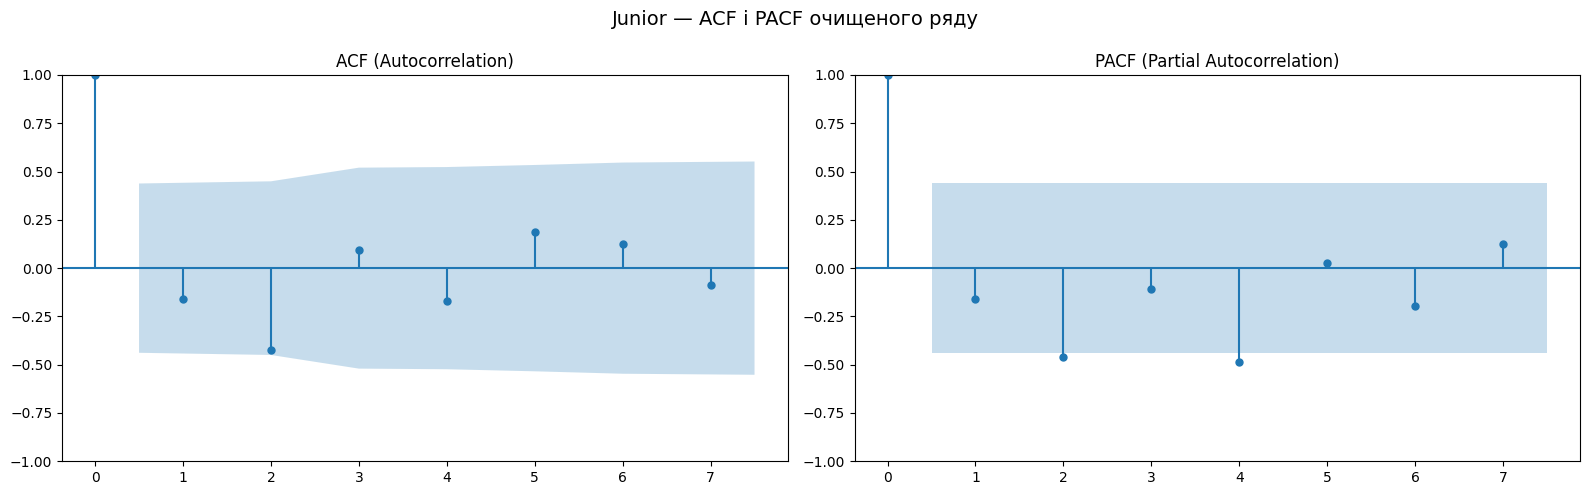

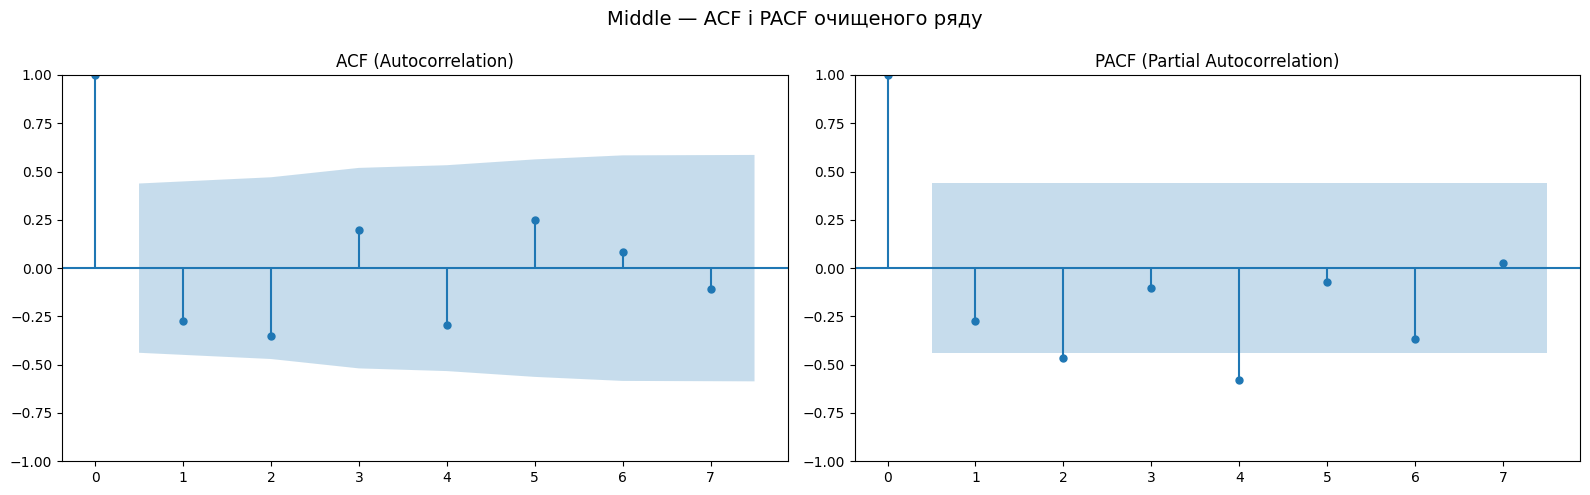

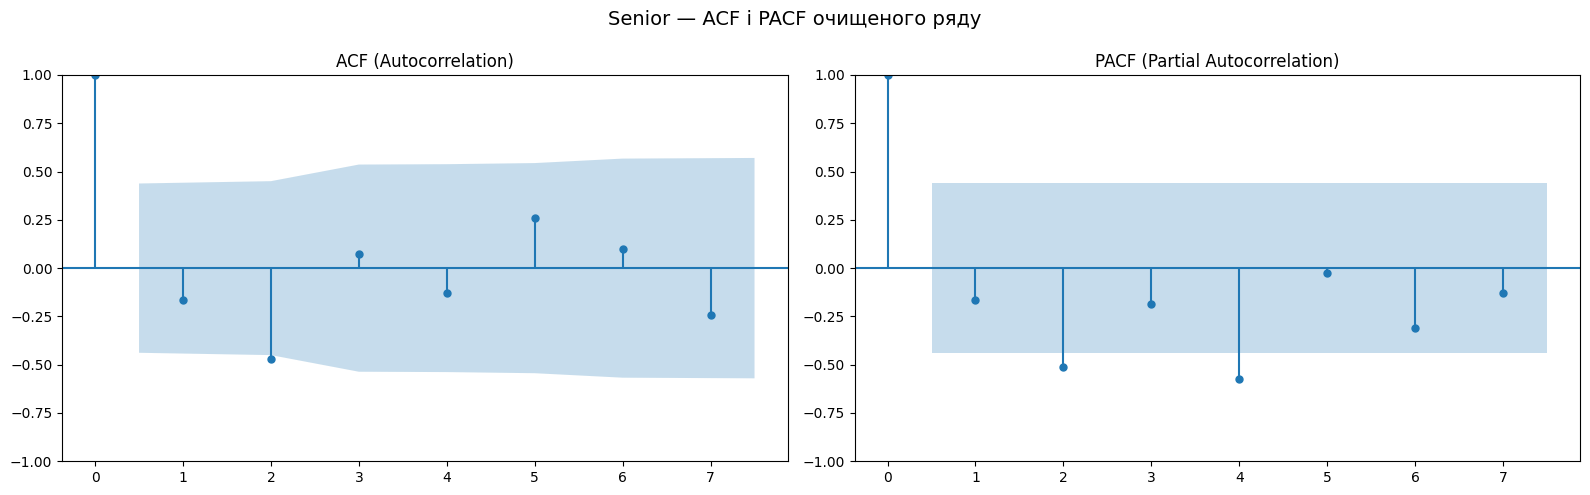

In [953]:
plot_acf_pacf_by_seniority(df_cleaned)

In [954]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

def prepare_features(df, lags=[2, 4]):
    df = df.copy()
    for lag in lags:
        df[f'lag_{lag}'] = df['average_salary'].shift(lag)
    df.dropna(inplace=True)
    return df

def train_ml_model_for_seniority(df_cleaned, seniority, lags=[2]):
    df_sub = df_cleaned[df_cleaned['final_seniority'] == seniority].copy()
    df_sub = prepare_features(df_sub, lags=lags)

    target = 'average_salary'
    lag_features = [f'lag_{lag}' for lag in lags]
    features = ['gdp_mln_usd', 'exchange_rate_uah_usd', 'google_search_for_data_science', 
                     'final_consumption_expenditure', 'delta_gdp_mln_usd', 'percent_delta_gdp_mln_usd',
                     'consumer price index', 'average_salary_usd', 'delta_average_salary_usd',
                     'percent_delta_average_salary_usd', 'year',	'half', 'cleaned'] + lag_features

    train_df = df_sub.iloc[:-4]
    test_df = df_sub.iloc[-4:]

    X_train = train_df[features]
    y_train = train_df[target]
    X_test = test_df[features]
    y_test = test_df[target]

    
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
    

    print(f"📊 {seniority.capitalize()} — MAE: {mae:.2f}, RMSE: {rmse_xgb:.2f}")

    plt.figure(figsize=(10, 4))
    plt.plot(test_df.index, y_test.values, label='Actual')
    plt.plot(test_df.index, preds, label='Predicted', linestyle='--')
    plt.title(f"{seniority.capitalize()} — Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return model



📊 Junior — MAE: 369.14, RMSE: 382.95


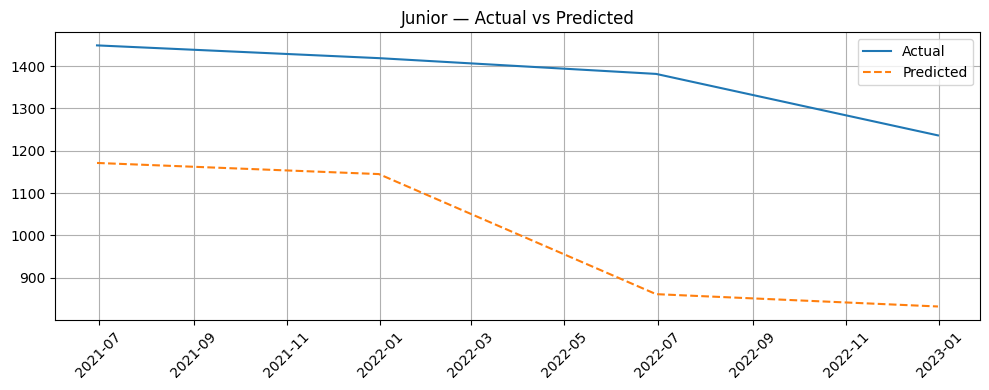

📊 Middle — MAE: 610.80, RMSE: 698.18


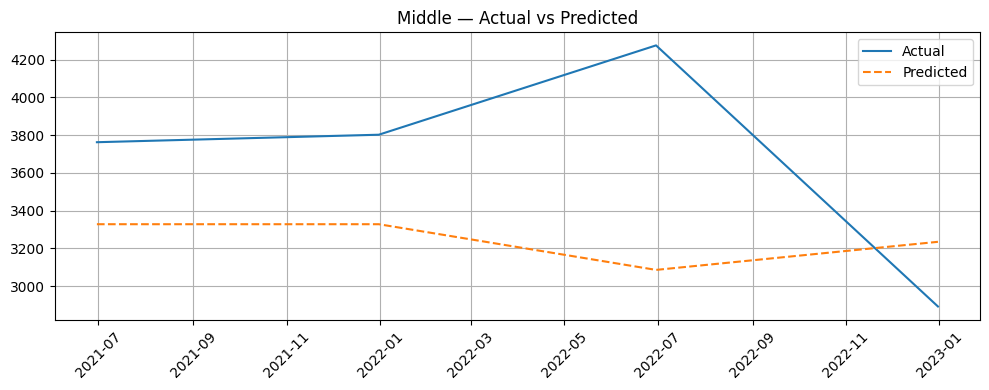

📊 Senior — MAE: 580.88, RMSE: 646.53


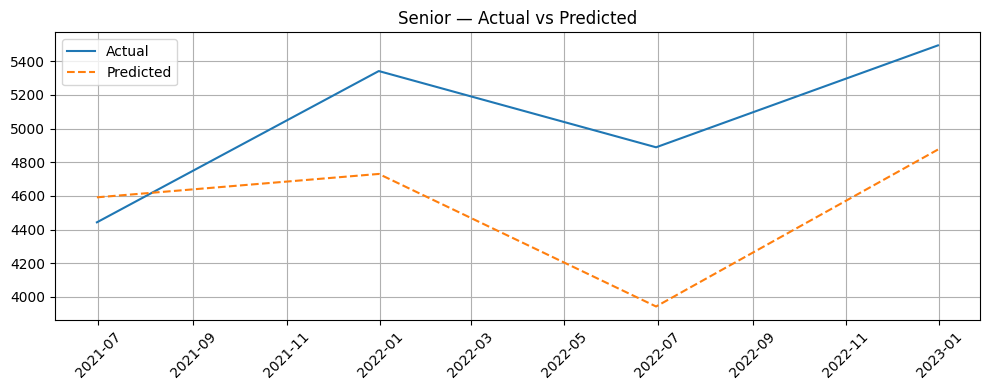

In [955]:
for level in df_cleaned['final_seniority'].unique():
    train_ml_model_for_seniority(df_cleaned, level)